In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
occupancy_grid = np.load("occupancy_grid.npy")
xlength = occupancy_grid.shape[0]
ylength = occupancy_grid.shape[1]
grid_nowalls = np.delete(occupancy_grid, [0, 1, xlength-1, xlength-2], 0)
grid_nowalls = np.delete(grid_nowalls, [0, 1, ylength-1, ylength-2], 1)

print(grid_nowalls)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [111]:
grid = occupancy_grid
upside = []
downside = []
for y in range(2, grid.shape[1]-2):
    for x in range(2, grid.shape[0]-2):
        if grid[x, y] == 1 and (grid[x, y+1] == 0 or y == grid.shape[1]-1):
            #print("found right side of obstacle")
            upside.append((x, y))
        if grid[x, y] == 1 and (grid[x, y-1] == 0 or y == 1):
            downside.append((x, y))

x1 = downside[0][0]
y1 = downside[0][1]
x2 = upside[0][0]
y2 = upside[0][1]
obstacles = [np.array([x1, y1, x2, y2])]
for i in range(1):
    linked = False
    x1 = downside[i][0]
    y1 = downside[i][1]
    x2 = upside[i][0]
    y2 = upside[i][1]
    i = 0
    print(x1)
    while linked == False and i < (len(obstacles)):
        if obstacles[i][2] == x1 - 1 and obstacles[i][3] == y2:
            obstacles[i][2] = x2
            obstacles[i][3] = y2 
            linked = True
            print("linked")
        else:
            obstacles.append(np.array([x1, y1, x2, y2]))
            linked = True
            print("added")
        i += 1

print(obstacles[0])
print(obstacles[1])
print(len(obstacles))



added
[ 2 10  2 11]
[ 2 10  2 11]
2


[(2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (8, 11), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (14, 11), (15, 11), (16, 11), (17, 11), (18, 11), (19, 33), (7, 46), (8, 46), (9, 46), (10, 46), (11, 46), (12, 46), (13, 46), (14, 46), (15, 46), (16, 46), (17, 46), (18, 46), (19, 46), (20, 46), (21, 46), (22, 46), (23, 46), (24, 46)]
[(2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (7, 10), (8, 10), (9, 10), (10, 10), (11, 10), (12, 10), (13, 10), (14, 10), (15, 10), (16, 10), (17, 10), (18, 10), (19, 10), (7, 23), (8, 45), (9, 45), (10, 45), (11, 45), (12, 45), (13, 45), (14, 45), (15, 45), (16, 45), (17, 45), (18, 45), (19, 45), (20, 45), (21, 45), (22, 45), (23, 45), (24, 45)]


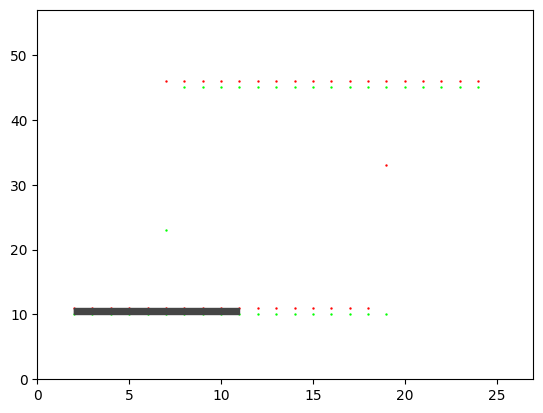

In [109]:
fig, ax = plt.subplots(1, 1)
for i in range(len(upside)):
    ax.scatter(upside[i][0], upside[i][1], color = "#FF0000", s = 0.5)
for i in range(len(downside)):
    ax.scatter(downside[i][0], downside[i][1], color = "#00FF00", s = 0.5)

for i in range(len(obstacles)):
    ax.add_patch(Rectangle((obstacles[i][0], obstacles[i][1]), (obstacles[i][2] - obstacles[i][0]), (obstacles[i][3] - obstacles[i][1]), color = '#454545'))
plt.xlim(0, xlength)
plt.ylim(0, ylength)


print(upside)
print(downside)